<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/Human_Resource_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np # Numerical Python
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), easy to use for data structures
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import warnings # Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program
import os# This module provides a portable way of using operating system dependent functionality
import matplotlib.pyplot as plt# Visualization

In [25]:
# load the dataset
warnings.filterwarnings("ignore") #Never print the matching warning
df = pd.read_csv('/content/drive/MyDrive/_Python/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Density Plots of Age, Working Years, Years at Present Organization and Years in Current Role

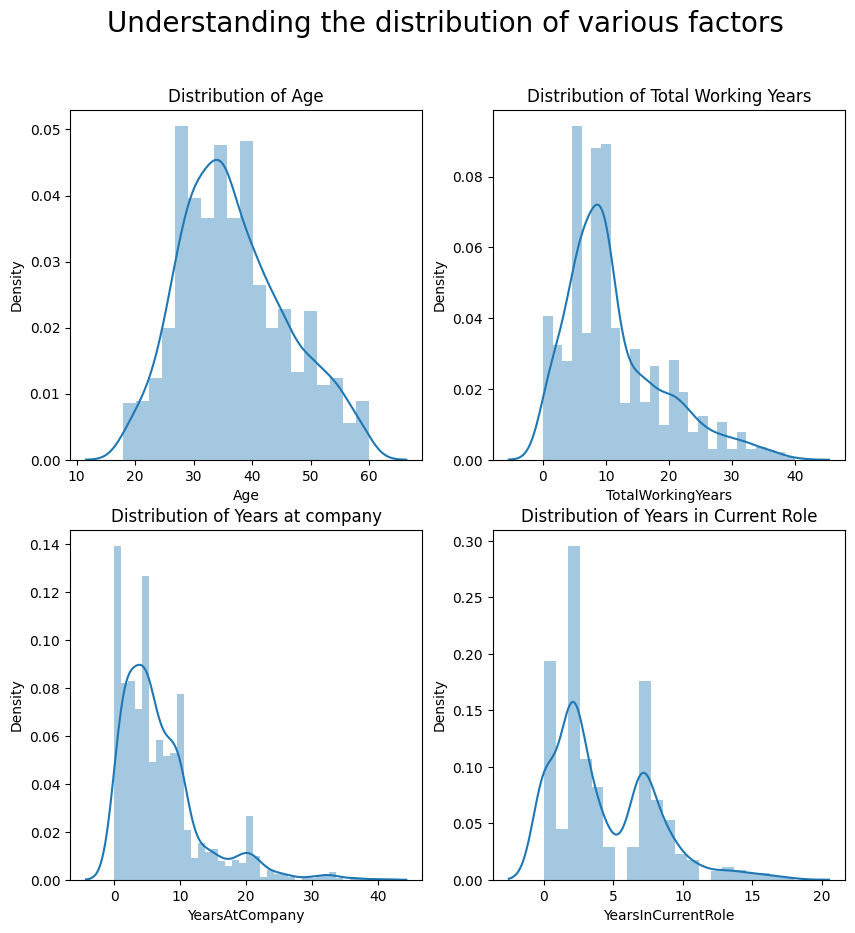

In [26]:
# Reference for adding title for each sub plots: https://gist.github.com/dyerrington/dac39db54161dafc9359995924413a12
fig,ax = plt.subplots(2,2, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Understanding the distribution of various factors", fontsize=20)
sns.distplot(df['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age')
sns.distplot(df['TotalWorkingYears'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()
# Show all of them now

From the plots, we find that majority of the employees are in the age group of 35-40 years and have a total experience of around 8-10 years. They have typically spent around 2-4 years at the current organization and have spent 2-3 years in the current role they are in.

# Count Plot

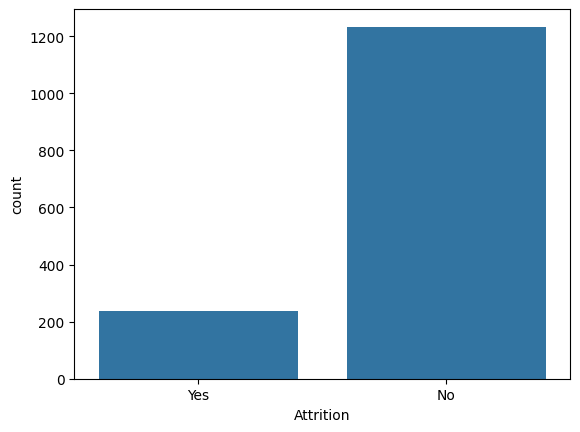

In [27]:
sns.countplot(x='Attrition', data=df)
plt.show()

Above plot shows that around 250 people have left the organization while the organization has been able to retain around 1200 people.

# Bar Plot

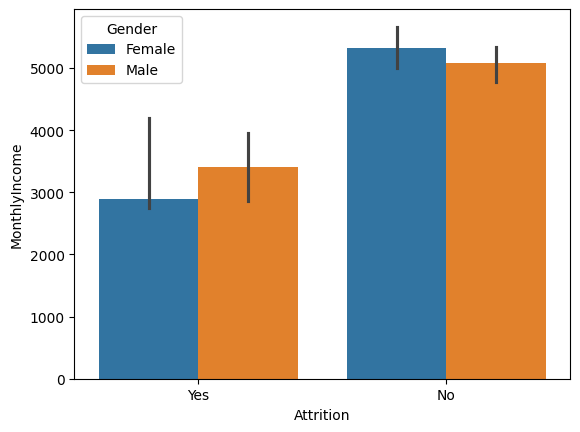

In [28]:
#Bar plot of Monthly income from the rate of attrition according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=df, estimator=median)
# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

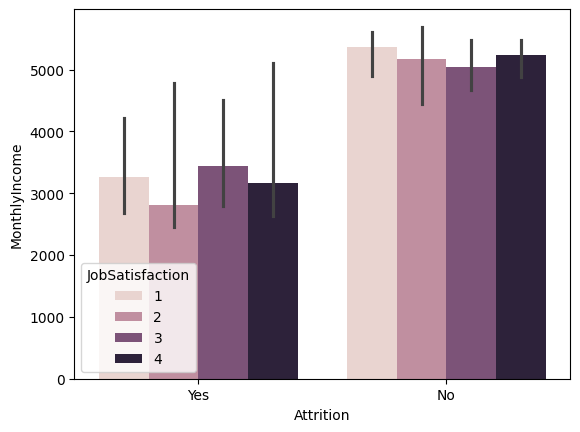

In [29]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=df, estimator=median)
# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

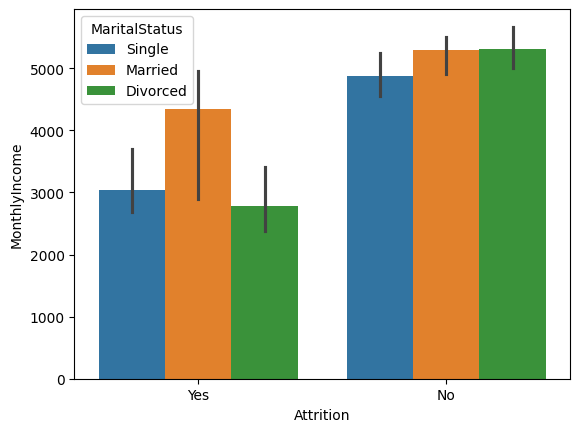

In [30]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=df, estimator=median)
# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

We can conclude that people with less monthlyincome (around 3000 units) are likely to leave the organization than those with better income (around 5000 units).

# Box Plots

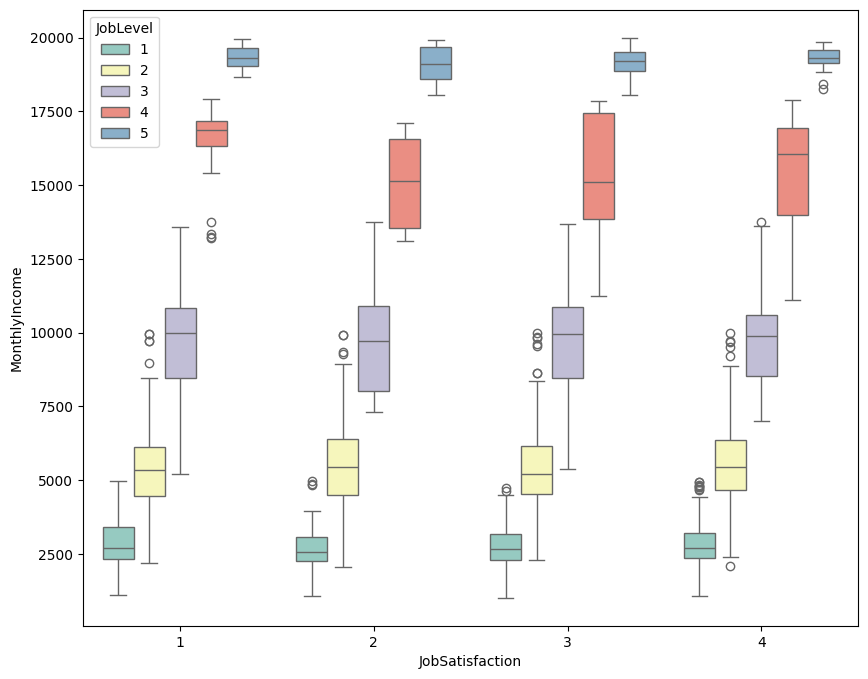

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', hue='JobLevel', palette='Set3', data=df, ax=ax)
plt.show()

We can clearly observe the difference in monthly income across different job levels. The difference in the monthly income is observed by the median value for different job satisfaction level.

# Violin Plots

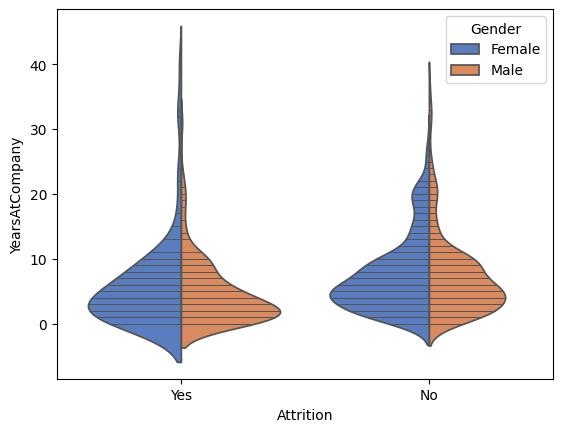

In [32]:
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=df, palette="muted", split=True,
               inner="stick")# When using hue nesting with a variable that takes two levels,
                                 # setting split to True will draw half of a violin for each level.
                                #This can make it easier to directly compare the distributions.
plt.show()

Violin plots are similar to box plots but they have the capability to explain the data better. The distribution of data is measured by the width of the violin plot. Here, we have plotted the number of years spent in an organization based on gender. The middle dashed line shows the median. The lines above and below the median show the interquartile range. The denser part shows the maximum population falls under that range and thinner part shows the lesser population. For details, please refer https://blog.modeanalytics.com/violin-plot-examples/

# Joint Plot / Scatter plot

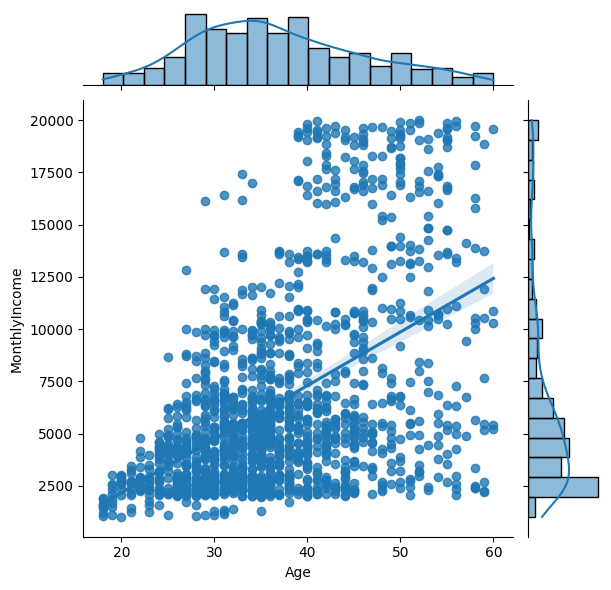

In [33]:
sns.jointplot(x='Age', y='MonthlyIncome', data=df, kind='reg')
plt.show()

Scatter plot shows the relationship between Age and Monthly Income. We can find a linear relationship. Further, the density plot above shows the distribution of age while density plot in the right shows the distribution of the monthly income.

# Factor Plot and Facet Grid

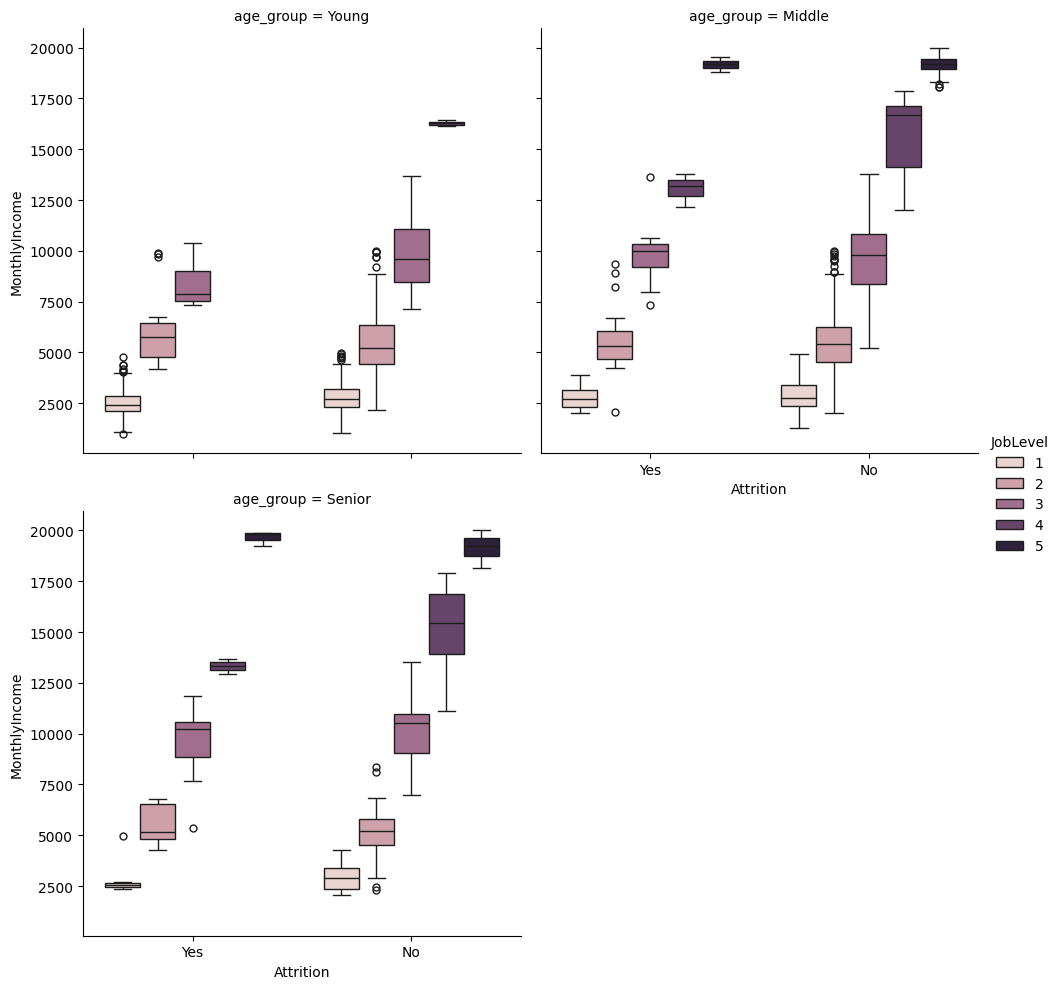

In [35]:
df['age_group'] = pd.cut(df['Age'], 3, labels=['Young', 'Middle', 'Senior'])
# Slicing the continuous data into various groups
# Age Group is the name of new column
sns.catplot(x =   'Attrition',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'JobLevel',    # Categorical
               col = 'age_group',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = df)
plt.show()

Above factor plot shows that monthly income plays an important role in retaining the employees in an organization. It can be observed across job levels and different age groups.

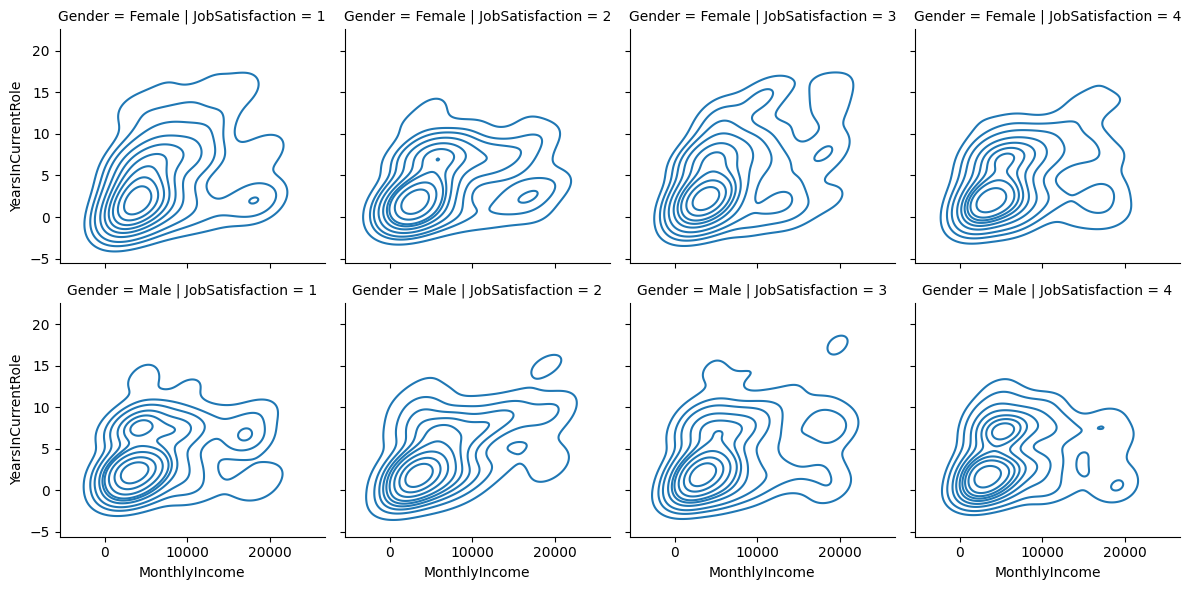

In [36]:
g = sns.FacetGrid(df, col="JobSatisfaction", row="Gender")
g.map(sns.kdeplot, "MonthlyIncome", "YearsInCurrentRole")
plt.show()

We have created kernel density estimation plot. It displays the density distribution of two continuous variables (namely, Monthly income and years in current role). We have created facets according to different job satisfaction levels and gender.

# Pair Plots

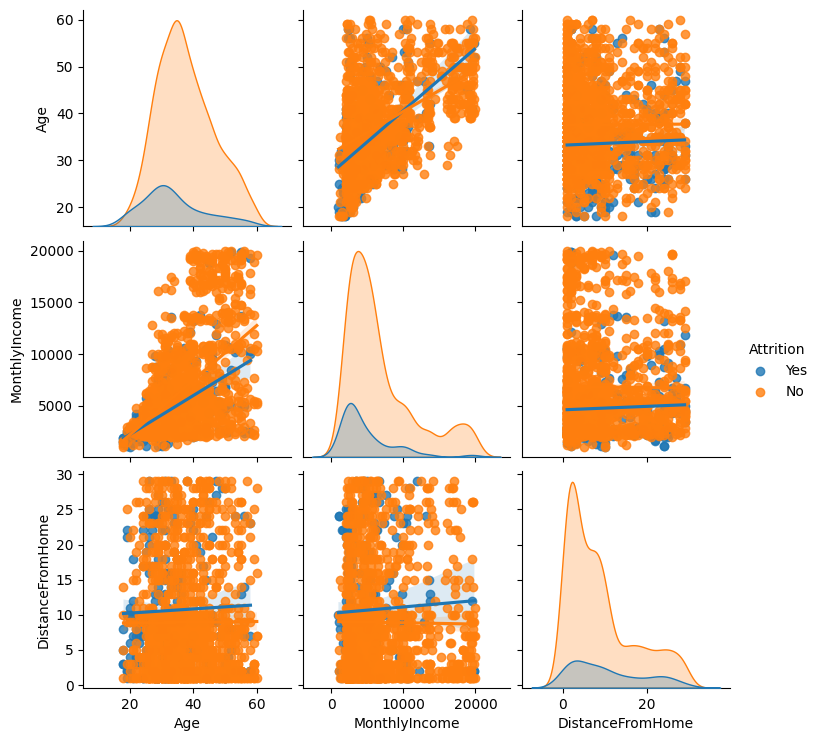

In [37]:
data_1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(df[data_1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

Pairwise plots between continuous variables show the relationship between them. For example. observing the relationship between Age and Monthly Income, we can find that with age, monthly income has increased but the increase is not similar for both groups (Attrition and Retention).

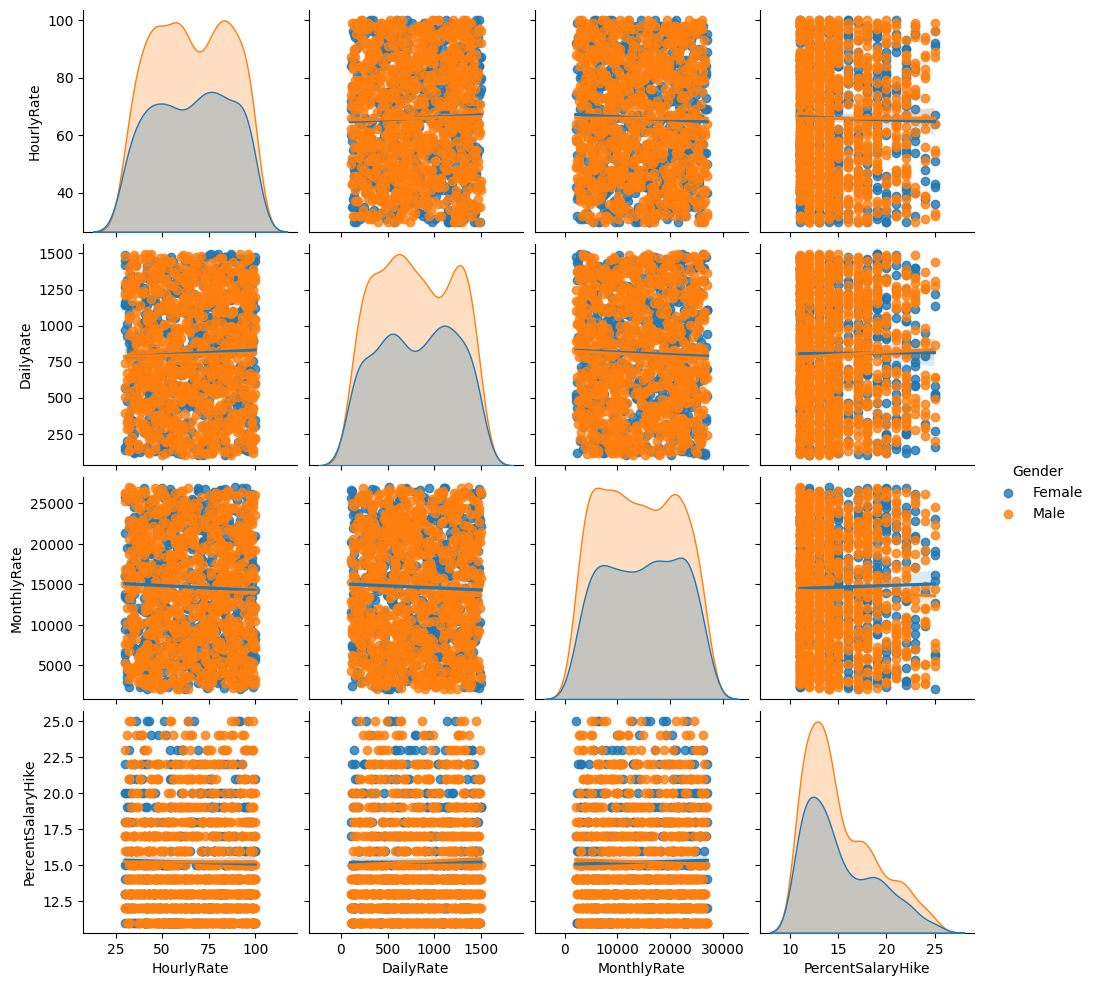

In [38]:
data_2 = ['Gender', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
sns.pairplot(df[data_2], kind="reg", diag_kind = "kde" , hue = 'Gender' )
plt.show()

The above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly rate and percent salary hike is same for both female and male employees.

# Correlation Plot

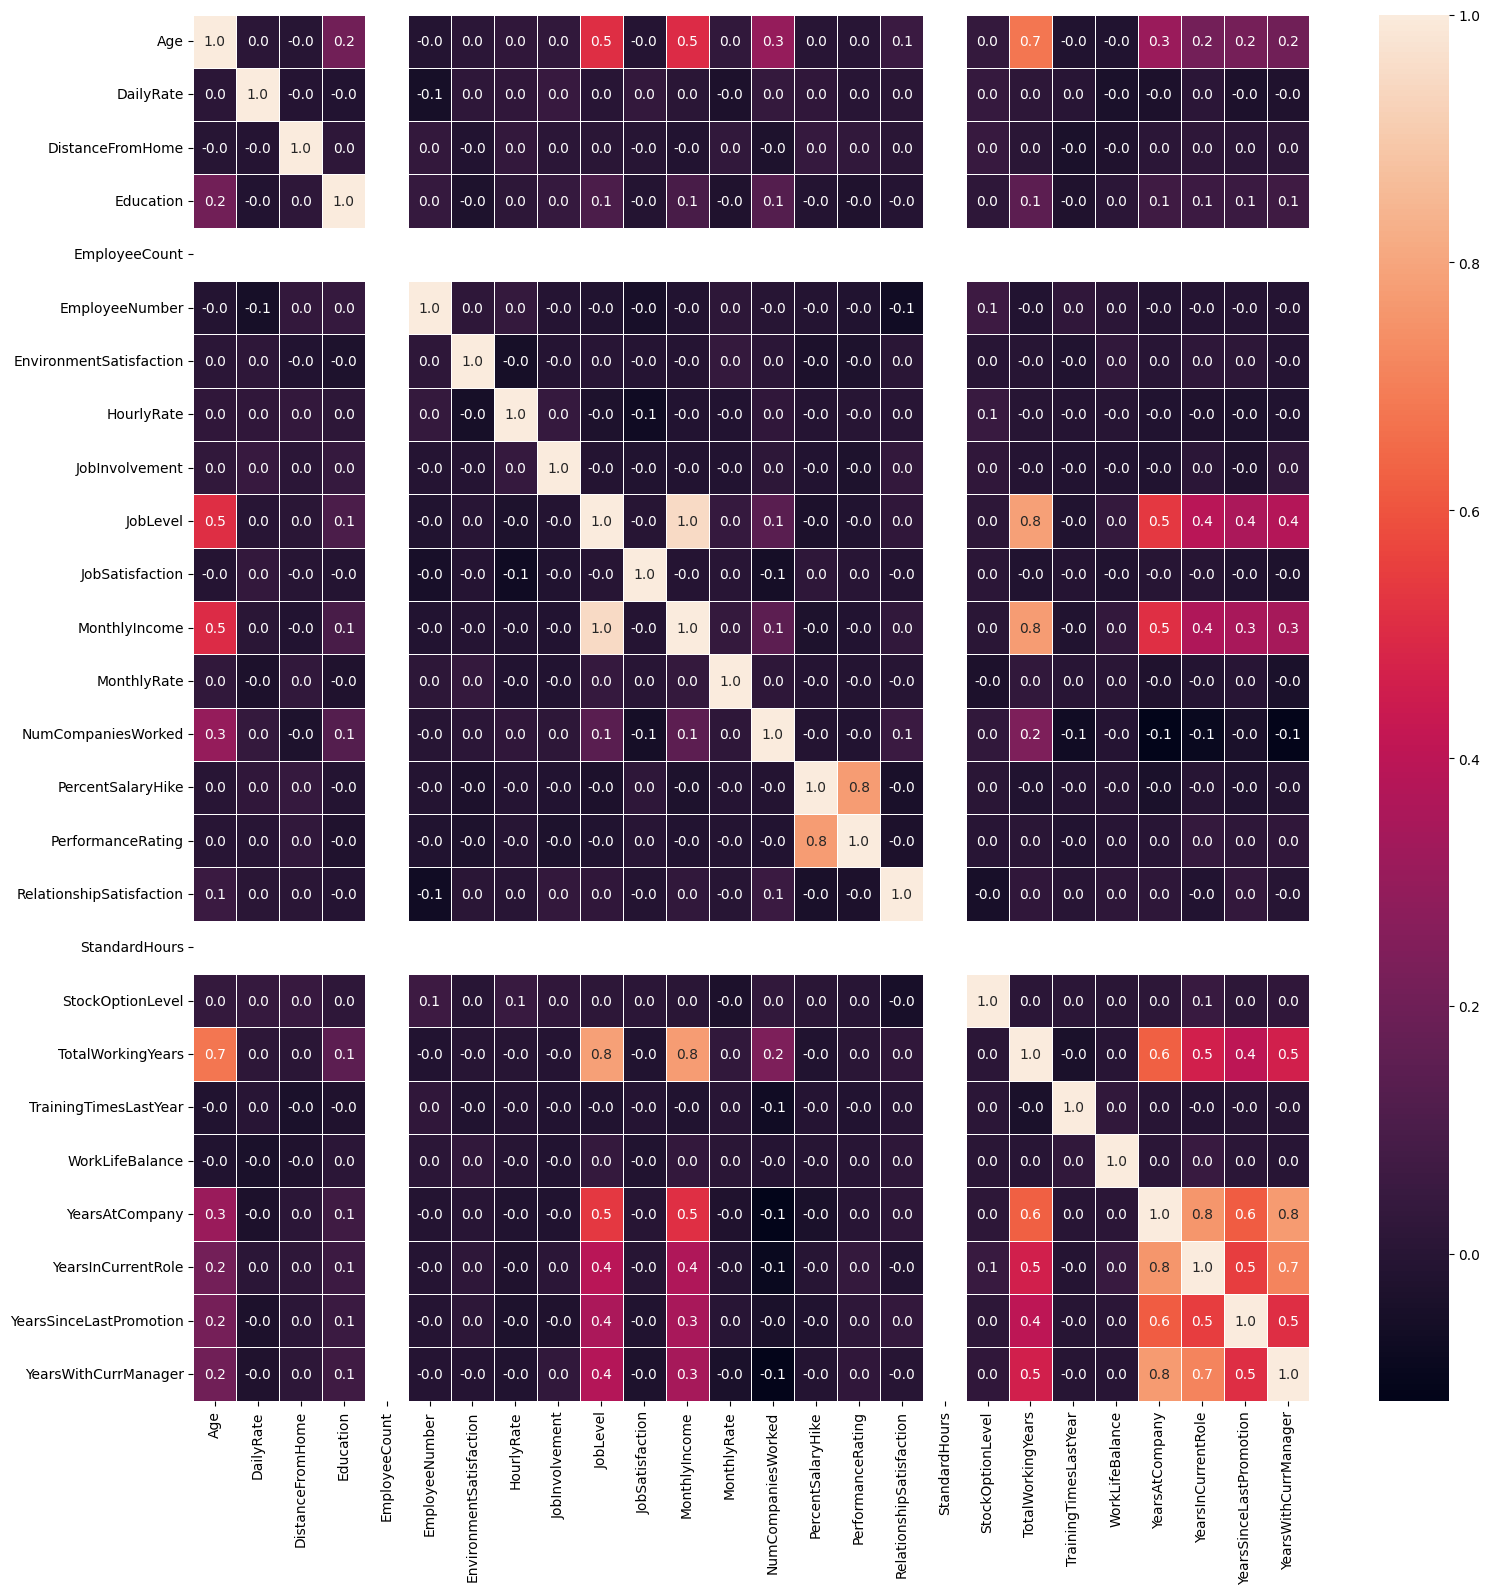

In [39]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

Two variables are said to be highly correlation when they have a value of 0.7 or greater. The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.

For more details on advanced plotting features in Seaborn, refer: https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

Ref source: https://www.kaggle.com/code/kukreti12/hr-analytics-using-python/notebook